<font size=+2 color="Black"><center><b>Effectiveness of Telehealth in Saudi Arabia During COVID-19 Pandemic</b></center></font>


# **About this notebook**



![](https://media1.tenor.com/images/ed7cffc243c6a6ffe63058e79d1ea0ac/tenor.gif?itemid=16735375)


In this notebook we discuss the current status of the use of remote health services applications    during the emerging Corona pandemic in Saudi Arabia , in addition to the effectiveness of these applications in supporting public health measures, and to know the opinions of users of applications such as the Tawakkalna application.


# Let's get started...
![](https://miro.medium.com/proxy/1*_JW1JaMpK_fVGld8pd1_JQ.gif)



# Loading libraries

In [9]:
#Loading libraries

import numpy as np
import pandas as pd
import seaborn as sns
import re
from collections import defaultdict,Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import textstat
from textblob import TextBlob 
from tqdm import tqdm
from statistics import *
from bidi.algorithm import get_display
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
#you have to download this packeg if you want arabic text 
import arabic_reshaper

# for scientific computing and technical computing
from scipy import linalg
from scipy.stats import norm
from scipy import stats

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
#from keras.initializers import Constant
#from keras.optimizers import Adam
#from tqdm import tqdm

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords

#from nltk.tokenize.moses import MosesDetokenizer

###### Farasa is an Arabic NLP toolkit serving the following tasks:
1.	Segmentation.
2.	Stemming.
3.	Named Entity Recognition (NER).
4.	Part Of Speech tagging (POS tagging).
5.	Diacritization.


In [10]:
from farasa.pos import FarasaPOSTagger 
from farasa.ner import FarasaNamedEntityRecognizer 
from farasa.diacratizer import FarasaDiacritizer 
from farasa.segmenter import FarasaSegmenter 
from farasa.stemmer import FarasaStemmer

In [11]:
# Sklearn
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
plt.style.use('seaborn')
from PIL import Image

In [12]:
# gensim
import gensim
from gensim import corpora, models, similarities, matutils
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Read Data

In [13]:
df=pd.read_excel("sehaty2.xlsx")

df.head()

,أراء المستخدمين,التقييم
0,برنامج رائع وخدمات ممتازة,موافق
1,جدا جميل ومختصر على الناس في تنبية المواعيد,موافق
2,جيد جدا..ويحتاج ان يدمج مع توكلنا لخدمة الجوال...,موافق
3,برنامج كويس جداً,موافق
4,للأسف التطبيق اصبح سيئ لم اجد اسم مدينتي ولا أ...,غير موافق


# Data pre-processing

In [14]:
#df.astype(str) converts all column of df_Opinion DataFrame to string type.
df_Opinion=df[df.columns[0]].astype(str)

df_Opinion.head()

0                            برنامج رائع وخدمات ممتازة
1         جدا جميل ومختصر على الناس في تنبية المواعيد 
2    جيد جدا..ويحتاج ان يدمج مع توكلنا لخدمة الجوال...
3                                     برنامج كويس جداً
4    للأسف التطبيق اصبح سيئ لم اجد اسم مدينتي ولا أ...
Name: أراء المستخدمين, dtype: object

In [15]:
df_Opinion.tail()

815                         التطبيق سيء جدا ارجو التعديل
816    صراحة فاشل جدا... يطالب بالتحديث ولا يوجد تحدي...
817    التطبيق سيء جدا كلما حاولت الدخول الى نفاذ يخر...
818                         تطبيق سيئ كل دخول يطلب تحديث
819                              للأسف تطبيق دون المستوى
Name: أراء المستخدمين, dtype: object

In [16]:
df_Opinion.shape

(820,)

In [17]:
print(type(df_Opinion))

<class 'pandas.core.series.Series'>


In [18]:
#Null values
df_Opinion.isnull().value_counts()

False    820
Name: أراء المستخدمين, dtype: int64

In [19]:
# Drop duplicates
df_Opinion.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (820, 2)


In [20]:
#Column name changeأراء المستخدمين
complaints_df=df[['أراء المستخدمين']].rename(columns={'أراء المستخدمين':'complaints'})

In [21]:
# To display full text
pd.set_option('display.max_colwidth',-1)#can see the whole data on one single row
complaints_df

,complaints
0,برنامج رائع وخدمات ممتازة
1,جدا جميل ومختصر على الناس في تنبية المواعيد
2,جيد جدا..ويحتاج ان يدمج مع توكلنا لخدمة الجوالات من كثرة البرامج والاستفادة..الآن أعمل دخول انتظر فترة ماتجي إرسالية رقم التحقق ايش المشكلة لا اعلم.
3,برنامج كويس جداً
4,للأسف التطبيق اصبح سيئ لم اجد اسم مدينتي ولا أستطيع فتح التطبيق
...,...
815,التطبيق سيء جدا ارجو التعديل
816,صراحة فاشل جدا... يطالب بالتحديث ولا يوجد تحديث بالمتج
817,التطبيق سيء جدا كلما حاولت الدخول الى نفاذ يخرجني من الصفحة بسبب لا يوجد اتصال في الانترنت و هذا خطأ في البرنامج اتمنى حل المشكلة لنستطيع التسجيل في موعد اللقاح .
818,تطبيق سيئ كل دخول يطلب تحديث


In [22]:
#load data into a DataFrame object:
dataframe=pd.DataFrame(df_Opinion)#delete
dataframe

,أراء المستخدمين
0,برنامج رائع وخدمات ممتازة
1,جدا جميل ومختصر على الناس في تنبية المواعيد
2,جيد جدا..ويحتاج ان يدمج مع توكلنا لخدمة الجوالات من كثرة البرامج والاستفادة..الآن أعمل دخول انتظر فترة ماتجي إرسالية رقم التحقق ايش المشكلة لا اعلم.
3,برنامج كويس جداً
4,للأسف التطبيق اصبح سيئ لم اجد اسم مدينتي ولا أستطيع فتح التطبيق
...,...
815,التطبيق سيء جدا ارجو التعديل
816,صراحة فاشل جدا... يطالب بالتحديث ولا يوجد تحديث بالمتج
817,التطبيق سيء جدا كلما حاولت الدخول الى نفاذ يخرجني من الصفحة بسبب لا يوجد اتصال في الانترنت و هذا خطأ في البرنامج اتمنى حل المشكلة لنستطيع التسجيل في موعد اللقاح .
818,تطبيق سيئ كل دخول يطلب تحديث


In [23]:
# data splitting
X_train, X_test = train_test_split(complaints_df, test_size=0.3, random_state=111)

In [24]:
X_train['complaints'].value_counts()

سيء جدا جدا بعد التحديث لازال يكتب حدث خطأ أعد المحاولة لاحقاً                                                          3
ممتاز جدا جدا                                                                                                           3
شكرا جزيلا لكم على هذا البرنامج الرائع                                                                                  3
أفضل وأحسن برنامج ماشاءالله تبارك الله                                                                                  3
برامج مفيد ويتضمن الوعى الصحى الذى يحتاجه كل شخص لكى يكون ملم بالفكر الصحى والإحتياجات الطبية التى نحتاجها فى حياتنا    3
                                                                                                                       ..
برنامج كويس جداً                                                                                                        1
ممتاز يغنيك عن برامج اخرى                                                                                               1
تطبيق فاشل جالس ثلاث ايا

In [25]:
X_train['complaints']

581    دايم يتعطل وأجد صعوبة في تسجيل المرافقين ولايحسب خطواتك اليومية بانتظام                                                                 
89     تطبيق ممتاز. أسأل الله أن يبارك لكل القائمين على هذا التطبيق والله يحمينا جميعا                                                         
451    ممتاز جدا و ليس معقد أو شي صعب شكرا لكل من ساهم و قام و طور هذا البرنامج و حفظ الله مملكتنا و مليكنا و امرائنا و شعب هذي المملكة الطيبة 
121    التحديث الجديد سيئ جداً ولا نستطيع الدخول الى التطبيق، أرجو مساعدتنا في ذلك                                                             
572    في مشكلة ف التطبيق اثناء تحديد الموقع                                                                                                   
                       ...                                                                                                                     
322    برنامج جيد                                                                                                                       

In [26]:
dataframe[dataframe.columns[0]]

0      برنامج رائع وخدمات ممتازة                                                                                                                                         
1      جدا جميل ومختصر على الناس في تنبية المواعيد                                                                                                                       
2      جيد جدا..ويحتاج ان يدمج مع توكلنا لخدمة الجوالات من كثرة البرامج والاستفادة..الآن أعمل دخول انتظر فترة ماتجي إرسالية رقم التحقق ايش المشكلة لا اعلم.              
3      برنامج كويس جداً                                                                                                                                                  
4      للأسف التطبيق اصبح سيئ لم اجد اسم مدينتي ولا أستطيع فتح التطبيق                                                                                                   
                                    ...                                                                                                               

In [27]:
dataframe

,أراء المستخدمين
0,برنامج رائع وخدمات ممتازة
1,جدا جميل ومختصر على الناس في تنبية المواعيد
2,جيد جدا..ويحتاج ان يدمج مع توكلنا لخدمة الجوالات من كثرة البرامج والاستفادة..الآن أعمل دخول انتظر فترة ماتجي إرسالية رقم التحقق ايش المشكلة لا اعلم.
3,برنامج كويس جداً
4,للأسف التطبيق اصبح سيئ لم اجد اسم مدينتي ولا أستطيع فتح التطبيق
...,...
815,التطبيق سيء جدا ارجو التعديل
816,صراحة فاشل جدا... يطالب بالتحديث ولا يوجد تحديث بالمتج
817,التطبيق سيء جدا كلما حاولت الدخول الى نفاذ يخرجني من الصفحة بسبب لا يوجد اتصال في الانترنت و هذا خطأ في البرنامج اتمنى حل المشكلة لنستطيع التسجيل في موعد اللقاح .
818,تطبيق سيئ كل دخول يطلب تحديث


In [28]:
#Column name changeأنا راضٍ عن الرعاية التي تلقيتها من خلال استخدام تكنولوجيا الرعاية الصحية عن بُعد

df_like=df[df.columns[1]].rename('like')

In [29]:
df_like=pd.DataFrame(df_like)
df_like

,like
0,موافق
1,موافق
2,موافق
3,موافق
4,غير موافق
...,...
815,غير موافق
816,غير موافق
817,غير موافق
818,غير موافق


In [30]:
df_like.count()

like    820
dtype: int64

In [31]:
print('Total Reviews in this data: {}'.format(df_like.shape[0]))
print('Total Unique Users in this data: {}'.format(df_like['like'].nunique()))

Total Reviews in this data: 820
Total Unique Users in this data: 3


In [32]:
percent_class=df_like.like.unique()
print(percent_class)

['موافق' 'غير موافق' 'لا أعرف']


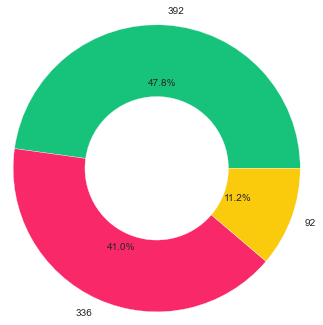

In [33]:
percent_class=df_like.value_counts()
colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_= plt.pie(percent_class,radius = 1.2,labels=percent_class,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

# Regular Expressions

we use Regular Expression by  string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

In [34]:
# Convert to list
data = dataframe[dataframe.columns[0]].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# Remove Numbers
data = [re.sub("\d", "", sent) for sent in data]

data = [re.sub("pdf", "", sent) for sent in data]
data = [re.sub("!", "", sent) for sent in data]
data = [re.sub("؟؟", "", sent) for sent in data]
data = [re.sub("👎👎", "", sent) for sent in data]
data = [re.sub("من", "ان", sent) for sent in data]
data = [re.sub("عن", "على", sent) for sent in data]
data = [re.sub("اذا", "لماذا", sent) for sent in data]
print(data)

['برنامج رائع وخدمات ممتازة', 'جدا جميل ومختصر على الناس في تنبية المواعيد ', 'جيد جدا..ويحتاج ان يدمج مع توكلنا لخدمة الجوالات ان كثرة البرامج والاستفادة..الآن أعمل دخول انتظر فترة ماتجي إرسالية رقم التحقق ايش المشكلة لا اعلم.', 'برنامج كويس جداً', 'للأسف التطبيق اصبح سيئ لم اجد اسم مدينتي ولا أستطيع فتح التطبيق', 'ثبت التطبيق وبعد الموقع وتحديد المدينة علىد اسم الحي لايكتب اسم الحي علي الاطلاق ', 'بعد التحديث الجديد تطبيق صحتي لايفتح وبعد ادخال البيانات المطلوبة ', 'ممتاز جدا بارك الله فيهم جميعا', 'ممتاز جدا و ليس معقد أو شي صعب شكرا لكل ان ساهم و قام و طور هذا البرنامج و حفظ الله مملكتنا و مليكنا و امرائنا و شعب هذي المملكة الطيبة ', 'ممتاز بارك الله فيكم ', 'شكرا جزيلا لكم على هذا البرنامج الرائع', 'ممتاز جدا لكن هناك مشكلة وهي تحديث السكن اتانى ان يكون تحديث السكن في صحتي مثل تحديث السكن في توكلنا سهل وسريع لان تحديث السكن في صحتي ليس به الا احياء محدده في المحافظة.', 'التحديث الاخير لا يستجيب علىد اختيار المدينة تكون خانة اختيار الحى غير نشطة رغم الضغط عليها والمحاولة عشرات المر

In [35]:
stopwords_list = stopwords.words('arabic')
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [36]:
# return an array
stemmer = FarasaStemmer()

def stemm(tweetstr):
    stemstr = []
    for s in tweetstr:
        st = stemmer.stem(s)
        stemstr.append(st)
    return stemstr

In [37]:
data = stemm(data)

In [38]:
data

['برنامج رائع خدمة ممتاز',
 'جد جميل مختصر على ناس في تنبي موعد',
 'جيد جد . .ويحتاج ان أدمج مع توكل خدمة جوال ان كثرة برنامج استفادة . .الآن عمل دخول انتظر فترة ماتجي إرسالي رقم تحقق ايش مشكلة لا اعلم .',
 'برنامج كويس جد',
 'أسف تطبيق أصبح سيئ لم أجد اسم مدينة لا استطاع فتح تطبيق',
 'ثبت تطبيق بعد موقع تحديد مدينة علىد اسم حي لايكتب اسم حي علي إطلاق',
 'بعد تحديث جديد تطبيق صحة لايفتح بعد إدخال بيان مطلوب',
 'ممتاز جد باراك الله في جميع',
 'ممتاز جد و ليس معقد أو شي صعب شكر كل ان ساهم و قام و طور هذا برنامج و حفظ الله مملكة و مليك و امرائ و شعب هذا مملكة طيب',
 'ممتاز باراك الله في',
 'شكر جزل ل على هذا برنامج رائع',
 'ممتاز جد لكن هناك مشكلة هي تحديث سكن اتانى ان كان تحديث سكن في صحة مثل تحديث سكن في توكل سهل سريع لان تحديث سكن في صحة ليس ب الا احياء محدد في محافظة .',
 'تحديث أخير لا استجاب علىد اختيار مدينة كان خانة اختيار الحى غير نشط رغم ضغط على محاولة عشر مرة دون جداء',
 'جميل لاائع في فكرة لكن لا خدم جيد في موعد سن',
 'لا توفر حجز موعد و وجد بعض خطأ في تطبيق و في أغلب عملية قا

# TF-IDF$CountVectorizer

In [206]:
#Instantiate
vectorizer=CountVectorizer()
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [207]:
countvec.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [208]:

vectorizer.get_feature_names() # feature names are the terms /words

['آآان',
 'آخر',
 'آش',
 'آمين',
 'آن',
 'أأكد',
 'أب',
 'أبد',
 'أبراج',
 'أبعد',
 'أبناء',
 'أتاح',
 'أتانى',
 'أتمكن',
 'أتى',
 'أثناء',
 'أجد',
 'أجل',
 'أجمع',
 'أجمل',
 'أجير',
 'أحب',
 'أحجز',
 'أحد',
 'أحدث',
 'أحسن',
 'أحيان',
 'أخ',
 'أخبر',
 'أخذ',
 'أخرج',
 'أخرى',
 'أخفى',
 'أخير',
 'أداء',
 'أدام',
 'أدخل',
 'أدمج',
 'أدنى',
 'أدى',
 'أذهب',
 'أراد',
 'أربع',
 'أرجو',
 'أرسل',
 'أرفع',
 'أريد',
 'أزاد',
 'أزعجتونا',
 'أسبوع',
 'أستطع',
 'أستطيع',
 'أستفاد',
 'أستقبال',
 'أسرة',
 'أسرع',
 'أسف',
 'أسلوب',
 'أسوأ',
 'أشرف',
 'أشكر',
 'أصبح',
 'أصلح',
 'أضاف',
 'أضغط',
 'أعاد',
 'أعد',
 'أعرف',
 'أعطى',
 'أعلم',
 'أعلى',
 'أغلب',
 'أغلق',
 'أغنى',
 'أفاد',
 'أفراد',
 'أفضل',
 'أفعل',
 'أقام',
 'أقدر',
 'أقرب',
 'أقصى',
 'أقفل',
 'أقوم',
 'أقوى',
 'أكتوبر',
 'أكثر',
 'أكل',
 'أكمل',
 'ألغائه',
 'ألف',
 'ألقى',
 'أم',
 'أما',
 'أمام',
 'أمة',
 'أمر',
 'أمس',
 'أمكن',
 'أمل',
 'أمو',
 'أن',
 'أنا',
 'أنت',
 'أنترنت',
 'أنزل',
 'أهل',
 'أهم',
 'أو',
 'أول',
 'أي',
 'أيام',
 'أين

In [209]:
# Instantate with hyperparameter = 20 terms
vectorizer=CountVectorizer(max_features=20)
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [210]:
print(countvec.A)
print(vectorizer.get_feature_names())

[[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 2 1 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['الله', 'ان', 'برنامج', 'بعد', 'تحديث', 'تطبيق', 'جد', 'جيد', 'رائع', 'شكر', 'طلب', 'على', 'عمل', 'فتح', 'في', 'كل', 'لا', 'ما', 'ممتاز', 'موعد']


In [211]:

# Instantiate with hyperparameter = 6 terms 
vectorizer=CountVectorizer(max_features=6, ngram_range=(1,2))
# Fit Transform
countvec=vectorizer.fit_transform(data)

In [212]:
print(countvec.A)
print(vectorizer.get_feature_names())

[[0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [2 0 0 1 0 1]
 ...
 [1 0 1 1 3 1]
 [0 1 1 0 0 0]
 [0 0 1 0 0 0]]
['ان', 'تحديث', 'تطبيق', 'جد', 'في', 'لا']


###### TF = (# occurrences of term t in document) / (# of words in document)

In [213]:
# No hyperparameter set for number of words
vectorizer=TfidfVectorizer(use_idf=False, norm='l1')
tfvec=vectorizer.fit_transform(data)

In [214]:
print(tfvec.A)
print(vectorizer.get_feature_names()) # gives all feature names

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['آآان', 'آخر', 'آش', 'آمين', 'آن', 'أأكد', 'أب', 'أبد', 'أبراج', 'أبعد', 'أبناء', 'أتاح', 'أتانى', 'أتمكن', 'أتى', 'أثناء', 'أجد', 'أجل', 'أجمع', 'أجمل', 'أجير', 'أحب', 'أحجز', 'أحد', 'أحدث', 'أحسن', 'أحيان', 'أخ', 'أخبر', 'أخذ', 'أخرج', 'أخرى', 'أخفى', 'أخير', 'أداء', 'أدام', 'أدخل', 'أدمج', 'أدنى', 'أدى', 'أذهب', 'أراد', 'أربع', 'أرجو', 'أرسل', 'أرفع', 'أريد', 'أزاد', 'أزعجتونا', 'أسبوع', 'أستطع', 'أستطيع', 'أستفاد', 'أستقبال', 'أسرة', 'أسرع', 'أسف', 'أسلوب', 'أسوأ', 'أشرف', 'أشكر', 'أصبح', 'أصلح', 'أضاف', 'أضغط', 'أعاد', 'أعد', 'أعرف', 'أعطى', 'أعلم', 'أعلى', 'أغلب', 'أغلق', 'أغنى', 'أفاد', 'أفراد', 'أفضل', 'أفعل', 'أقام', 'أقدر', 'أقرب', 'أقصى', 'أقفل', 'أقوم', 'أقوى', 'أكتوبر', 'أكثر', 'أكل', 'أكمل', 'ألغائه', 'ألف', 'ألقى', 'أم', 'أما', 'أمام', 'أمة', 'أمر', 'أمس', 'أمكن', 'أمل', 'أمو', 'أن', 'أنا', 'أنت', 'أنترنت', 'أنزل', '

###### IDF = log(# of documents / # documents with term t in them)


In [215]:
# Instantiate
vectorizer_idf=TfidfVectorizer(smooth_idf=False) # eliminates log(0)
# Fit Transform
tfidfvec=vectorizer_idf.fit_transform(data)

In [216]:
print(vectorizer_idf.idf_)
print(vectorizer_idf.get_feature_names())

[7.70930434 4.6647819  7.70930434 ... 7.70930434 5.31140907 7.01615716]
['آآان', 'آخر', 'آش', 'آمين', 'آن', 'أأكد', 'أب', 'أبد', 'أبراج', 'أبعد', 'أبناء', 'أتاح', 'أتانى', 'أتمكن', 'أتى', 'أثناء', 'أجد', 'أجل', 'أجمع', 'أجمل', 'أجير', 'أحب', 'أحجز', 'أحد', 'أحدث', 'أحسن', 'أحيان', 'أخ', 'أخبر', 'أخذ', 'أخرج', 'أخرى', 'أخفى', 'أخير', 'أداء', 'أدام', 'أدخل', 'أدمج', 'أدنى', 'أدى', 'أذهب', 'أراد', 'أربع', 'أرجو', 'أرسل', 'أرفع', 'أريد', 'أزاد', 'أزعجتونا', 'أسبوع', 'أستطع', 'أستطيع', 'أستفاد', 'أستقبال', 'أسرة', 'أسرع', 'أسف', 'أسلوب', 'أسوأ', 'أشرف', 'أشكر', 'أصبح', 'أصلح', 'أضاف', 'أضغط', 'أعاد', 'أعد', 'أعرف', 'أعطى', 'أعلم', 'أعلى', 'أغلب', 'أغلق', 'أغنى', 'أفاد', 'أفراد', 'أفضل', 'أفعل', 'أقام', 'أقدر', 'أقرب', 'أقصى', 'أقفل', 'أقوم', 'أقوى', 'أكتوبر', 'أكثر', 'أكل', 'أكمل', 'ألغائه', 'ألف', 'ألقى', 'أم', 'أما', 'أمام', 'أمة', 'أمر', 'أمس', 'أمكن', 'أمل', 'أمو', 'أن', 'أنا', 'أنت', 'أنترنت', 'أنزل', 'أهل', 'أهم', 'أو', 'أول', 'أي', 'أيام', 'أين', 'إجابة', 'إجازة', 'إحتياج', 'إختيار',

In [217]:
# This is the final TF-IDF matrix
tfidfvec.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Topic Modeling -LDA

In [218]:
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2) ] 
    stems = [stemmer.stem(item) for item in tokens]
    return tokens

In [219]:
vectorizer_tf = TfidfVectorizer(max_df=0.75, min_df=50, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(X_train.complaints)

In [220]:
tf_vectors.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 1., 0., ..., 2., 0., 0.]])

In [221]:
vectorizer_idf.get_feature_names()

['آآان',
 'آخر',
 'آش',
 'آمين',
 'آن',
 'أأكد',
 'أب',
 'أبد',
 'أبراج',
 'أبعد',
 'أبناء',
 'أتاح',
 'أتانى',
 'أتمكن',
 'أتى',
 'أثناء',
 'أجد',
 'أجل',
 'أجمع',
 'أجمل',
 'أجير',
 'أحب',
 'أحجز',
 'أحد',
 'أحدث',
 'أحسن',
 'أحيان',
 'أخ',
 'أخبر',
 'أخذ',
 'أخرج',
 'أخرى',
 'أخفى',
 'أخير',
 'أداء',
 'أدام',
 'أدخل',
 'أدمج',
 'أدنى',
 'أدى',
 'أذهب',
 'أراد',
 'أربع',
 'أرجو',
 'أرسل',
 'أرفع',
 'أريد',
 'أزاد',
 'أزعجتونا',
 'أسبوع',
 'أستطع',
 'أستطيع',
 'أستفاد',
 'أستقبال',
 'أسرة',
 'أسرع',
 'أسف',
 'أسلوب',
 'أسوأ',
 'أشرف',
 'أشكر',
 'أصبح',
 'أصلح',
 'أضاف',
 'أضغط',
 'أعاد',
 'أعد',
 'أعرف',
 'أعطى',
 'أعلم',
 'أعلى',
 'أغلب',
 'أغلق',
 'أغنى',
 'أفاد',
 'أفراد',
 'أفضل',
 'أفعل',
 'أقام',
 'أقدر',
 'أقرب',
 'أقصى',
 'أقفل',
 'أقوم',
 'أقوى',
 'أكتوبر',
 'أكثر',
 'أكل',
 'أكمل',
 'ألغائه',
 'ألف',
 'ألقى',
 'أم',
 'أما',
 'أمام',
 'أمة',
 'أمر',
 'أمس',
 'أمكن',
 'أمل',
 'أمو',
 'أن',
 'أنا',
 'أنت',
 'أنترنت',
 'أنزل',
 'أهل',
 'أهم',
 'أو',
 'أول',
 'أي',
 'أيام',
 'أين

In [222]:
X_train.complaints

581    دايم يتعطل وأجد صعوبة في تسجيل المرافقين ولايحسب خطواتك اليومية بانتظام                                                                 
89     تطبيق ممتاز. أسأل الله أن يبارك لكل القائمين على هذا التطبيق والله يحمينا جميعا                                                         
451    ممتاز جدا و ليس معقد أو شي صعب شكرا لكل من ساهم و قام و طور هذا البرنامج و حفظ الله مملكتنا و مليكنا و امرائنا و شعب هذي المملكة الطيبة 
121    التحديث الجديد سيئ جداً ولا نستطيع الدخول الى التطبيق، أرجو مساعدتنا في ذلك                                                             
572    في مشكلة ف التطبيق اثناء تحديد الموقع                                                                                                   
                       ...                                                                                                                     
322    برنامج جيد                                                                                                                       

In [223]:
vectorizer_tf.get_feature_names()

['التحديث',
 'التطبيق',
 'الله',
 'تحديث',
 'تطبيق',
 'جدا',
 'على',
 'في',
 'لا',
 'ممتاز',
 'من']

### Decomposition method

In [224]:
# Instantiate LDA
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [225]:
W1

array([[0.08391219, 0.08346359, 0.08333927, 0.58241306, 0.0835062 ,
        0.08336569],
       [0.02834504, 0.22614567, 0.02863836, 0.02835667, 0.66069902,
        0.02781525],
       [0.21542277, 0.03334983, 0.03383585, 0.0334858 , 0.65027835,
        0.0336274 ],
       ...,
       [0.08334304, 0.08333795, 0.58254324, 0.08369198, 0.08373197,
        0.08335181],
       [0.72160241, 0.05557489, 0.0556119 , 0.05560405, 0.05558896,
        0.0560178 ],
       [0.02411066, 0.66745287, 0.02384645, 0.02445949, 0.02388845,
        0.23624208]])

In [226]:
W1.shape

(574, 6)

In [227]:
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [228]:
len(topics)

6

In [229]:
topics

['من التطبيق في على الله تطبيق تحديث ممتاز جدا لا التحديث',
 'التطبيق لا التحديث تحديث في على من الله تطبيق جدا ممتاز',
 'جدا على التطبيق التحديث من لا تطبيق تحديث ممتاز الله في',
 'تطبيق في جدا التحديث من التطبيق لا تحديث على ممتاز الله',
 'ممتاز الله جدا تطبيق في على من التطبيق التحديث لا تحديث',
 'تحديث التحديث من التطبيق ممتاز في جدا تطبيق على لا الله']

In [231]:

colnames = ["إزعاج","ممتاز","صورة","تحديد الموقع","مساعدة","انترنت"]
docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [232]:
df_doc_topic

,إزعاج,ممتاز,صورة,تحديد الموقع,مساعدة,انترنت,dominant_topic
Doc0,0.08,0.08,0.08,0.58,0.08,0.08,3
Doc1,0.03,0.23,0.03,0.03,0.66,0.03,4
Doc2,0.22,0.03,0.03,0.03,0.65,0.03,4
Doc3,0.03,0.40,0.19,0.31,0.03,0.03,1
Doc4,0.06,0.42,0.06,0.35,0.06,0.06,1
...,...,...,...,...,...,...,...
Doc569,0.17,0.17,0.17,0.17,0.17,0.17,0
Doc570,0.08,0.08,0.08,0.58,0.08,0.08,3
Doc571,0.08,0.08,0.58,0.08,0.08,0.08,2
Doc572,0.72,0.06,0.06,0.06,0.06,0.06,0


In [233]:
X_train.head()

,complaints
581,دايم يتعطل وأجد صعوبة في تسجيل المرافقين ولايحسب خطواتك اليومية بانتظام
89,تطبيق ممتاز. أسأل الله أن يبارك لكل القائمين على هذا التطبيق والله يحمينا جميعا
451,ممتاز جدا و ليس معقد أو شي صعب شكرا لكل من ساهم و قام و طور هذا البرنامج و حفظ الله مملكتنا و مليكنا و امرائنا و شعب هذي المملكة الطيبة
121,التحديث الجديد سيئ جداً ولا نستطيع الدخول الى التطبيق، أرجو مساعدتنا في ذلك
572,في مشكلة ف التطبيق اثناء تحديد الموقع


In [234]:
# Test on the first 5 documents in X_test
Wtest = lda.transform(vectorizer_tf.transform(X_test.complaints[:5]))

In [235]:
# doccument - topic matris for the first 5 documents in the X_test data
Wtest.shape

(5, 6)

In [237]:
colnames = ["إزعاج","ممتاز","صورة","تحديد الموقع","مساعدة","انترنت"]
docnames = ["Doc" + str(i) for i in range(len(X_test.complaints[:5]))]
df_doc_topic = pd.DataFrame(np.round(Wtest, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [238]:
df_doc_topic.shape

(5, 7)

In [239]:
df_doc_topic

,إزعاج,ممتاز,صورة,تحديد الموقع,مساعدة,انترنت,dominant_topic
Doc0,0.62,0.03,0.03,0.03,0.27,0.03,0
Doc1,0.17,0.17,0.17,0.17,0.17,0.17,0
Doc2,0.08,0.58,0.08,0.08,0.08,0.08,1
Doc3,0.06,0.72,0.06,0.06,0.06,0.06,1
Doc4,0.06,0.06,0.06,0.39,0.06,0.39,3


In [240]:
X_test.shape

(246, 1)

In [241]:
X_test.head()

,complaints
328,ممتاز - تم التمكن من الإطلاع على الجرعتين من خلال تطبيق صحتي
456,يفيد المجتمع
803,برنامج لا يخدم هدفه الصحيح
695,التطبيق للأسف لا يعمل
739,تطبيق فاشل يعلق وكل مافتحته طلب تحديث


# Topic Modling -NMF

# Stemming words with NLTK

In [242]:
#stemmer = PorterStemmer()
stemmer = nltk.stem.SnowballStemmer('arabic')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [243]:
# This function will tokenize the words, convert to lower case and do the stemming
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
    tokens = map(str.lower, tokens)
    stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
    return stems

In [244]:
# Instatiate
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
# Fit & Transform
tfidf_vectors=vectorizer.fit_transform(X_train["complaints"].values.astype("U"))

In [245]:
tfidf_vectors.shape # THE TERM DOCUMENT MATRIX (MATRIX ON THE LEFT HAND SIDE)

(574, 1000)

In [246]:
tfidf_vectors.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.43979725],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [247]:
vectorizer.get_feature_names()

['....',
 'اباس',
 'ابد',
 'ابد حجز',
 'ابداع',
 'ابداع رايع',
 'ابشر',
 'ابو',
 'اتتعامل',
 'اتتعامل ابد',
 'اتصال',
 'اتصال انتر',
 'اتم',
 'اتمنى',
 'اتمنى اصلاح',
 'اجاب',
 'اجاز',
 'اجاز مرض',
 'اجر',
 'احاول',
 'احاول احدث',
 'احتياج',
 'احتياج الطب',
 'احجز',
 'احجز موعد',
 'احدث',
 'احدث وادخل',
 'احذف',
 'احذف واحمل',
 'احس',
 'احس رنامج',
 'احسنتم',
 'احصل',
 'احمل',
 'احيا',
 'اختر',
 'اختف',
 'اختف جرع',
 'اختيار',
 'اخذ',
 'اخر',
 'اخرى',
 'اخطاء',
 'اخير',
 'اخير تخرج',
 'اخير تطبيق',
 'اخير موعد',
 'اخير يطلب',
 'اخير يعمل',
 'ادخال',
 'ادخل',
 'ادخل بيان',
 'ادخل تطبيق',
 'ادخل مدين',
 'ادخل يطلع',
 'ارج',
 'ارج مشكل',
 'ارجو',
 'ارجو تحس',
 'ارد',
 'ارسال',
 'ارسل',
 'ارسل اجاز',
 'اريد',
 'ازال',
 'ازال يكتب',
 'ازدهار',
 'اسبوع',
 'استجاب',
 'استخدام',
 'استشار',
 'استشار تعمل',
 'استطيع',
 'استطيع تطبيق',
 'استطيع حجز',
 'استطيع دخول',
 'استفاد',
 'استفاده',
 'استفاده تطبيق',
 'استفد',
 'استقبال',
 'استقبال تقدير',
 'استمرار',
 'اسرع',
 'اسف',
 'اسف برنامج',
 'اسف ت

In [248]:
len(vectorizer.get_feature_names())

1000

# DECOMPOSITION USING NMF

In [249]:
# INSTANTIATE. n_components is the number of TOPICS
clf = decomposition.NMF(n_components=6, random_state=111) # components is the number of topics

W1 = clf.fit_transform(tfidf_vectors)
H1 = clf.components_

#### NMF Decomposition
### tfidf_vectors =  W1 x H1

In [250]:
tfidf_vectors.shape

(574, 1000)

In [251]:
W1.shape

(574, 6)

In [252]:
W1

array([[7.70347624e-03, 5.92319167e-04, 2.91455241e-04, 8.27370513e-04,
        3.75176879e-05, 4.77955073e-03],
       [0.00000000e+00, 1.59272218e-01, 1.85994009e-01, 9.87539138e-02,
        0.00000000e+00, 0.00000000e+00],
       [4.85528877e-03, 5.94137932e-02, 0.00000000e+00, 4.57203127e-02,
        3.15039828e-03, 4.51003507e-02],
       ...,
       [0.00000000e+00, 1.48980327e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.93395606e-01],
       [0.00000000e+00, 1.36249243e-02, 2.34002866e-02, 1.91720709e-02,
        2.15615883e-02, 0.00000000e+00],
       [2.18175999e-01, 0.00000000e+00, 6.26741298e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [253]:
H1.shape

(6, 1000)

In [254]:
H1 # TOPICS - TERMS MATRIX

array([[2.37203709e-02, 0.00000000e+00, 2.20813542e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.28530558e-02],
       [6.42980961e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.49442667e-02, 2.89911623e-02, 2.69520986e-03],
       [5.20440846e-03, 0.00000000e+00, 1.16440077e-03, ...,
        1.64649689e-02, 3.45600206e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.53795946e-02, 0.00000000e+00],
       [0.00000000e+00, 1.10174069e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.20178838e-03, 0.00000000e+00, 4.70615766e-05, ...,
        0.00000000e+00, 0.00000000e+00, 7.35401292e-03]])

In [255]:
H1[:, 0:1]

array([[0.02372037],
       [0.00064298],
       [0.00520441],
       [0.        ],
       [0.        ],
       [0.00420179]])

In [256]:
num_words=15 # TOPIC IS DEFINED AS A COLLECTION OF 15 WORDS

vocab = np.array(vectorizer.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [257]:
topics # The top 15 words in the 6 topics

['تحديث يطلب يطلب تحديث يفتح تطبيق يطلب برنامج يعمل مشكل محدث يوجد جديد تطبيق تحديث تطبيق يفتح دخول تحديث جديد',
 'ممتاز تطبيق ممتاز خدم خدم ممتاز برنامج رنامج ممتاز جميع والل وصف برنامج ممتاز ممتاز شكر مريح امور ممتاز سهل صراح',
 'تطبيق يعمل موقع موعد ايعمل مشكل مواعيد تطبيق ممتاز تطبيق ايعمل تحديد يعلق تطبيق تحديث تحديد موقع تطبيق يعمل اسف',
 'الله بار بار الله يكم الله يكم جزا جزا الله خير الله خير ممتاز بار جهود ممتاز جزا ماشاء الله ماشاء وجز',
 'رنامج رنامج ممتاز اكثر رنامج اكثر اسبوع اكثر رايع اباس يطلب كويس معقد يعلق موقع تحديد موقع تحديد ماشاءالل تبار',
 'رايع جدا تطبيق رايع شكر جميل مفيد خدم اكثر رايع اكثر خدم ممتاز برنامج رايع رايع جدا رايع مفيد برنامج جزيل']

In [259]:
colnames = ["إزعاج","ممتاز","صورة","تحديد الموقع","مساعدة","انترنت"]

docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
df_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic



In [260]:
df_doc_topic

,إزعاج,ممتاز,صورة,تحديد الموقع,مساعدة,انترنت,dominant_topic
Doc0,0.008,0.001,0.000,0.001,0.000,0.005,0
Doc1,0.000,0.159,0.186,0.099,0.000,0.000,2
Doc2,0.005,0.059,0.000,0.046,0.003,0.045,1
Doc3,0.079,0.000,0.092,0.000,0.000,0.061,2
Doc4,0.007,0.000,0.192,0.000,0.024,0.000,2
...,...,...,...,...,...,...,...
Doc569,0.000,0.000,0.000,0.000,0.547,0.000,4
Doc570,0.000,0.000,0.103,0.001,0.008,0.000,2
Doc571,0.000,0.149,0.000,0.000,0.000,0.193,5
Doc572,0.000,0.014,0.023,0.019,0.022,0.000,2


In [168]:
X_train.head(20)

,complaints
581,دايم يتعطل وأجد صعوبة في تسجيل المرافقين ولايحسب خطواتك اليومية بانتظام
89,تطبيق ممتاز. أسأل الله أن يبارك لكل القائمين على هذا التطبيق والله يحمينا جميعا
451,ممتاز جدا و ليس معقد أو شي صعب شكرا لكل من ساهم و قام و طور هذا البرنامج و حفظ الله مملكتنا و مليكنا و امرائنا و شعب هذي المملكة الطيبة
121,التحديث الجديد سيئ جداً ولا نستطيع الدخول الى التطبيق، أرجو مساعدتنا في ذلك
572,في مشكلة ف التطبيق اثناء تحديد الموقع
303,البرنامج جيد جدا لكن لا استطيع اضافة تابع في التطبيق يعطي رسالة ان بيانات التابع غير مسجلة في النظام
656,هذا التحديث سئ جدا
707,التطبيق معلق الله المستعان
779,لابأس فيه
433,أصبح الآن ممتاز ويفتح التطبيق بشكل جيد


In [274]:
# We now test the model on the test set
Wtest = clf.transform(vectorizer.transform(X_test.complaints[:5]))

In [275]:
colnames = ["إزعاج","ممتاز","صورة","تحديد الموقع","مساعدة","انترنت"]
docnames = ["Doc" + str(i) for i in range(len(X_test[:5].complaints))]
df_doc_topic = pd.DataFrame(np.round(Wtest, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [276]:
df_doc_topic

,إزعاج,ممتاز,صورة,تحديد الموقع,مساعدة,انترنت,dominant_topic
Doc0,0.00,0.095,0.103,0.0,0.000,0.000,2
Doc1,0.00,0.007,0.001,0.0,0.000,0.003,1
Doc2,0.00,0.004,0.000,0.0,0.231,0.000,4
Doc3,0.01,0.000,0.231,0.0,0.000,0.000,2
Doc4,0.09,0.000,0.134,0.0,0.017,0.000,2


In [174]:
X_test.head(10)

,complaints
328,ممتاز - تم التمكن من الإطلاع على الجرعتين من خلال تطبيق صحتي
456,يفيد المجتمع
803,برنامج لا يخدم هدفه الصحيح
695,التطبيق للأسف لا يعمل
739,تطبيق فاشل يعلق وكل مافتحته طلب تحديث
167,التطبيق لايقبل إضافة بعض التابعين ، ولا يقبل التعديل بعد الإضافة
335,ممتاز وانصح الجميع بتحمله وجزاء الله من ساهم فيه
1,جدا جميل ومختصر على الناس في تنبية المواعيد
781,شكرا يعطيكم العافيه
122,البرنامج يعاني من بعض المشاكل، يحتاج إلى تحسين


# Topic Modling -SVD  

In [175]:
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(X_train.complaints).todense()
vectors.shape

(574, 1739)

In [176]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(1739,)

In [177]:
%time U, s, Vt = linalg.svd(vectors, full_matrices=False)

Wall time: 299 ms


In [178]:
pd.DataFrame(U)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573
0,-0.012406,0.008973,-0.019299,0.023797,-0.027961,0.020348,-0.048144,0.019703,-0.045008,0.006211,-0.000049,0.007247,-0.009543,0.001389,-0.024846,-0.003526,0.014232,-0.006496,0.005615,-0.003976,0.005030,-0.009198,0.005270,-0.006452,0.005050,-0.000852,0.003134,-0.003614,0.002399,0.001725,-0.007937,-0.003481,0.008906,-0.023009,-0.002309,-0.022581,0.034744,-0.025690,0.004048,-0.005544,0.007668,-0.007818,0.007274,-0.004921,0.005342,-0.005128,0.029084,-0.018871,0.009024,-0.001028,0.013956,-0.013001,0.011970,-0.018887,0.000472,-0.006095,0.006876,-0.019192,-0.017935,0.011287,-0.016934,-0.042716,0.005026,-0.000578,-0.004174,0.009991,-0.025510,-0.012507,0.019887,0.008504,-0.015233,0.017398,0.020540,-0.020301,-0.035273,-0.019412,0.018300,0.030459,-0.003478,-0.037838,0.006595,0.001614,0.014126,-0.052584,-0.014430,0.011497,0.006790,0.001980,0.010054,-0.021413,-0.015993,-0.035426,0.045679,0.030974,-0.009485,-0.022073,-0.036851,0.016887,0.037823,0.010763,0.010616,0.076700,-0.052615,0.085464,-0.034638,0.040298,-0.003710,0.116990,-0.057929,0.032498,-0.069943,0.088748,-0.046481,0.117182,-0.030392,0.012329,-0.080979,0.186279,-0.081140,0.019442,-0.159939,0.067193,-0.048521,0.213784,-0.089827,0.062928,-0.202302,0.052354,-0.082827,0.303286,-0.023485,0.179764,0.018925,-0.137368,0.192929,-0.037272,-0.344416,0.197408,-0.038751,0.131097,-0.048410,-0.066441,0.119395,-0.166020,-0.057724,0.102635,0.036758,-0.156718,-0.029215,0.024006,0.035459,-0.017320,-0.030223,0.078265,-0.131344,-0.045531,-0.059511,0.164265,0.006836,-0.103770,0.009041,0.017102,0.035060,-0.083879,0.060858,0.024405,0.128036,-0.115009,0.108792,0.033300,0.044927,-0.060896,0.005202,0.036230,0.036475,-0.053255,-0.036212,0.010376,0.014322,0.043558,0.033661,-0.050453,0.012888,0.045508,0.007525,0.006880,-0.039296,-0.022329,0.036074,0.030688,0.038790,-0.020674,-0.033809,-0.076367,0.069694,0.040694,0.027537,-0.102300,0.020883,0.047101,0.015820,-0.044028,-0.048214,0.024950,0.005132,0.018399,-0.020641,-0.012191,-0.017634,0.011896,0.009909,0.010712,0.011618,-0.044056,-0.011598,-0.013988,0.018030,0.017234,0.061775,-0.007344,-0.008914,-0.035310

In [179]:
pd.DataFrame(s)

,0
0,2.094574e+01
1,1.635112e+01
2,1.256170e+01
3,1.201321e+01
4,1.188276e+01
...,...
569,1.379625e-15
570,1.379625e-15
571,1.379625e-15
572,1.379625e-15


In [180]:
pd.DataFrame(Vt)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738
0,-0.003842,-0.001461,-0.001345,-0.013384,-0.000711,-0.002533,-0.005349,-0.000989,-0.003188,-0.001227,-0.001006,-0.009186,-0.006026,-0.005110,-0.002754,-0.002130,-0.001614,-0.001222,-0.001466,-0.004593,-0.005643,-0.004191,-0.005907,-0.003251,-0.007555,-0.002863,-0.000751,-0.002936,-0.004875,-0.014900,-0.001019,-0.002949,-0.007986,-0.000654,-0.001299,-0.005349,-0.003693,-0.003910,-0.001251,-0.009450,-0.004593,-0.001466,-0.002173,-0.002513,-0.004437,-0.008155,-0.009047,-0.009915,-0.003129,-0.004593,-0.005349,-0.000823,-0.004593,-0.008174,-0.017985,-0.002711,-0.004593,-0.001549,-0.000879,-0.001188,-0.004401,-0.024590,-0.003543,-0.003837,-0.005766,-0.000935,-0.003295,-0.005786,-0.004466,-0.002513,-0.002851,-0.002555,-0.003276,-0.006553,-0.003129,-0.003712,-0.007445,-0.002652,-0.002939,-0.000812,-0.003929,-0.000377,-0.001867,-0.024978,-0.005349,-0.003095,-0.003361,-0.006557,-1.350244e-03,-0.005439,-0.007263,-0.001023,-0.002452,-0.016317,-0.001245,-0.002681,-0.009525,-0.002439,-0.004319,-0.006652,-0.004167,-0.002059,-0.002680,-0.004613,-0.007638,-0.002279,-0.002673,-0.010166,-0.014389,-0.000579,-0.000596,-0.000163,-0.003153,-0.000579,-0.000815,-0.000434,-0.001156,-0.002842,-0.004660,-0.001019,-0.001245,-0.003985,-0.001614,-0.002440,-0.001290,-0.003985,-0.005728,-0.011729,-0.012550,-0.000907,-0.013023,-0.011892,-0.002806,-0.001403,-0.034919,-0.018580,-0.002387,-0.003827,-0.000720,-0.023036,-0.013447,-0.003516,-0.004613,-0.001527,-0.005143,-0.005464,-0.004581,-0.005422,-0.001078,-0.000923,-0.015498,-0.000271,-0.000861,-0.002462,-0.003683,-0.002498,-0.013877,-0.002680,-0.001461,-0.002295,-0.003579,-0.004159,-0.002711,-0.017154,-0.007761,-0.002462,-0.008029,-0.001383,-0.002291,-0.002848,-0.003827,-0.000186,-0.001461,-0.002513,-0.001167,-0.001086,-0.002249,-0.007843,-0.001227,-0.000163,-0.004511,-0.010861,-5.288734e-03,-0.002029,-0.00

# WordCloud

 WordCloud a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud.  how to create a WordCloud of your own  and customize it as you see fit. This will be quite handy for exploring text data .

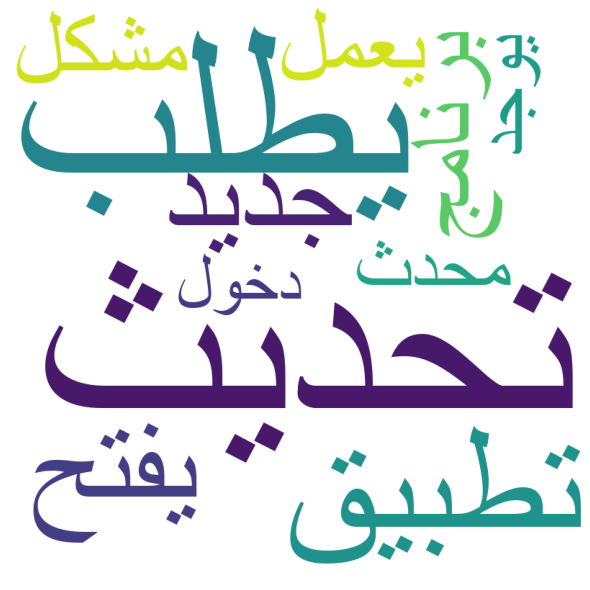

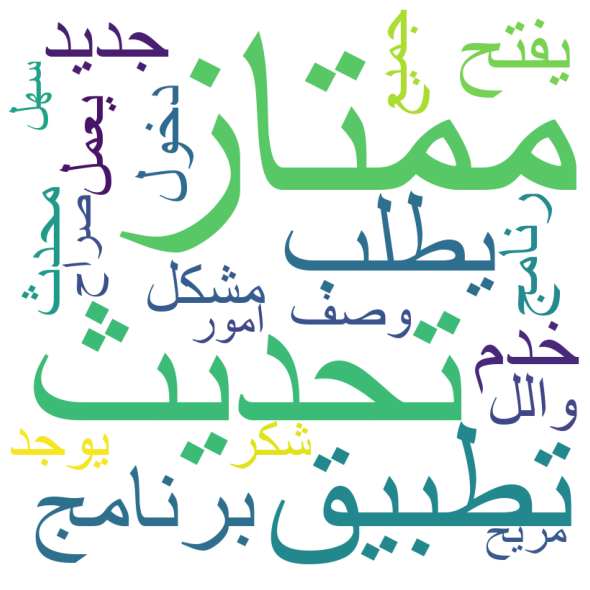

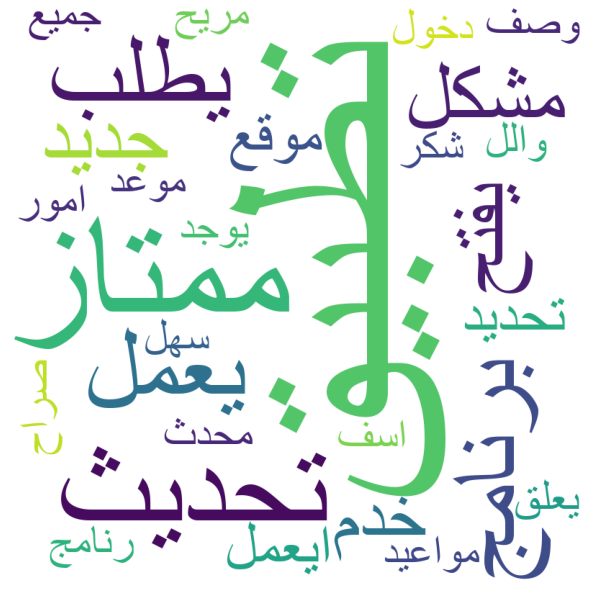

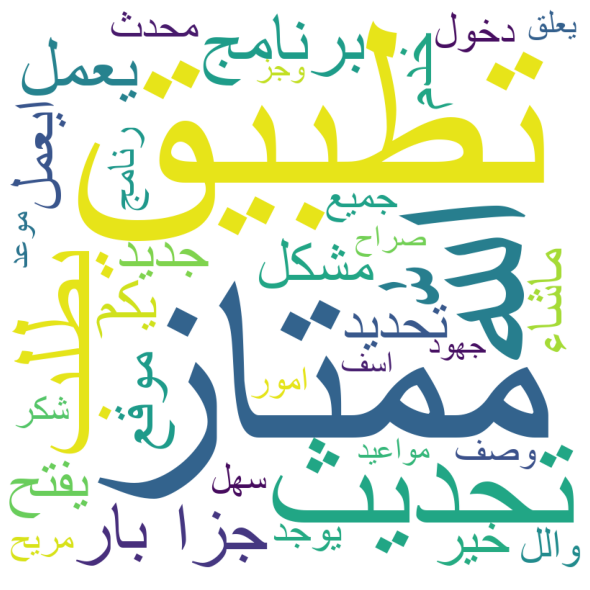

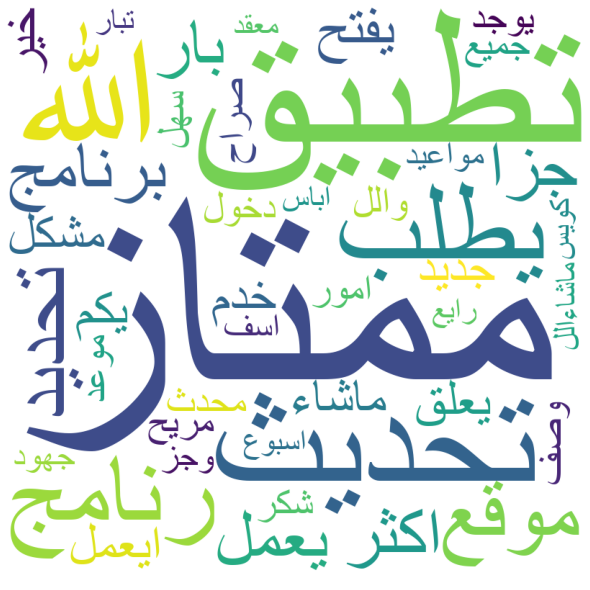

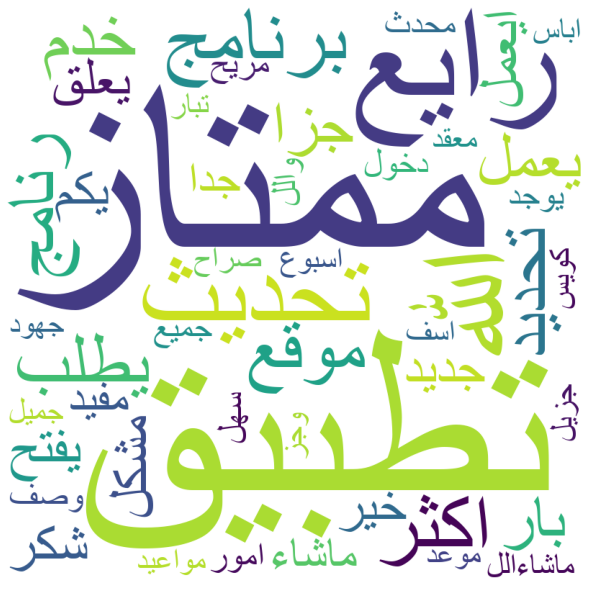

In [102]:

comment_words = '' 
stopwords = set(topics) 


for val in topics: 

    # typecaste each val to string 
    val = str(val) 

    # split the value 
    tokens = val.split() 

    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
        text_to_be_reshaped = tokens[i]
        reshaped_text = arabic_reshaper.reshape(text_to_be_reshaped)
        tokens[i] = reshaped_text[::-1] 
    comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', font_path = 'arial.ttf',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = "white") 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

### A plot the number of most common opinions in tawakkalna application  using the plot method:

<AxesSubplot:>

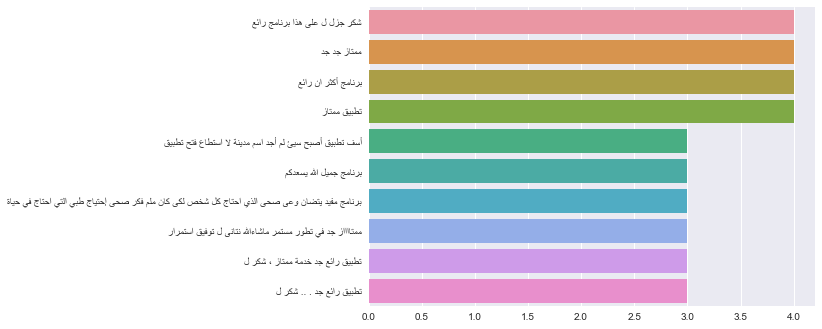

In [103]:
stop=stopwords_list
counter=Counter(data)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        reshaped_text = arabic_reshaper.reshape(word)
        word= reshaped_text[::-1] 
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)